<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_pandas_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>

# Pandas bevezető 2.

https://klajosw.blogspot.com/

https://github.com/klajosw/

pandas: NumPy-ra épülő adatfeldolgozó és elemző eszköz

---

In [0]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# DataFrame-et létre lehet hozni szótárból...
data1 = {"a": [1, 1, 2], "b": [3.0, 4.0, None]}
df1 = pd.DataFrame(data1)
print(df1)
print('-----------------')

# ...sztring-lista párok listájából
data2 = [("a", [1, 1, 2]), ("b", [3.0, 4.0, None])]
df2 = pd.DataFrame.from_dict(dict(data2))
print(df2)
print('-----------------')

# ...szótárak listájából
data3 = [{"a": 1, "b": 3}, {"a": 1, "b": 4}, {"a": 2}]
df3 = pd.DataFrame(data3)
print(df3)
print('-----------------')

# ...és még számos egyéb módon


   a    b
0  1  3.0
1  1  4.0
2  2  NaN
-----------------
   a    b
0  1  3.0
1  1  4.0
2  2  NaN
-----------------
   a    b
0  1  3.0
1  1  4.0
2  2  NaN
-----------------


In [0]:
## egyszerű elem kimetszés
def slices(s, *args):  ## Kimetsző
    position = 0
    for length in args:
        yield s[position:position + length]
        position += length
        
print(list(slices('abcdefghijklmnopqrstuvwxyz0123456789', 2, 10, 50)))
print('---------------------------')
d,c,h = slices('LajosBélaAttilaFeri', 5, 4, 6)
print(d,c,h)


['ab', 'cdefghijkl', 'mnopqrstuvwxyz0123456789']
---------------------------
Lajos Béla Attila


In [0]:

# minden DataFrame-hez és Series-hez tartozik index
print(df1.index)
# (alapértelmezés szerint az index 0-tól induló, 1-esével növekedő sorszám)

# ...de természetesen mást is megadhatunk indexnek
df4 = pd.DataFrame(data1, ["xx", "yy", "zz"])
print(df4.index)

#Int64Index([0, 1, 2], dtype='int64')
#Index(['xx', 'yy', 'zz'], dtype='object')


RangeIndex(start=0, stop=3, step=1)
Index(['xx', 'yy', 'zz'], dtype='object')


In [0]:


# példák Series létrehozásra:
se1 = pd.Series([2, 3, 4])
se2 = pd.Series([2, 3, 4], ["xx", "yy", "zz"]) # a 2. argumentum az index

# DataFrame-ből oszlopot [] operátorral lehet kiválasztani
df1["a"] # <= Series-t ad eredményül
# ...illetve ha az oszlop neve érvényes azonosítónév, akkor . operátorral is
df1.a    # <= Series-t ad eredményül


0    1
1    1
2    2
Name: a, dtype: int64

In [0]:
# DataFrame-ből sort a .iloc attribútumon keresztül lehet kiválasztani
df1.iloc[0]      # <= ez is Series-t ad eredményül
df1.iloc[[1, 0]] # <= DataFrame-et ad eredményül, mivel 2 sort választottunk ki

,a,b
1,1,4.0
0,1,3.0


In [0]:
# Series-ből elemet [] operátorral lehet kiválasztani
print(se1[0])
print(se2["xx"])

# a nyers adattartalmát a values attribútumon keresztül lehet elérni
se1.values # <= numpy tömböt ad eredményül

2
2


array([2, 3, 4], dtype=int64)

         tottime   apercall    cumtime    percall
count  10.000000  10.000000  10.000000  10.000000
mean    0.001100   0.000300   0.012400   0.006300
std     0.002601   0.000949   0.005296   0.009166
min     0.000000   0.000000   0.008000   0.000000
25%     0.000000   0.000000   0.009000   0.000000
50%     0.000000   0.000000   0.011000   0.000000
75%     0.000000   0.000000   0.012500   0.010250
max     0.008000   0.003000   0.022000   0.022000
---------------------------
1
50
---------------------------
count     10
unique     3
top       50
freq       5
Name: ncalls, dtype: object
---------------------------
---------------------------
   ncalls  tottime  apercall  cumtime  percall  \
0       1    0.000     0.000    0.022    0.022   
1       1    0.000     0.000    0.022    0.022   
2  354/52    0.000     0.000    0.013    0.000   
3       1    0.000     0.000    0.011    0.011   
4      50    0.000     0.000    0.011    0.000   
5      50    0.000     0.000    0.011    0.000   
6  

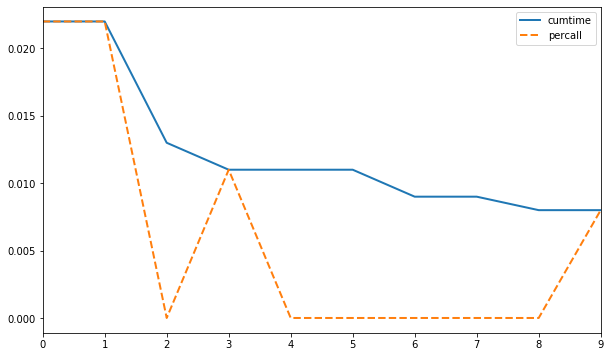

In [0]:
# Import
#import pandas as pd
#import numpy as np

path = r'c:\Users\User\Documents\mintak\jupiter\kl\aa_kl_2020\fixlinefile.txt'

# Using Pandas with a column specification
col_specification = [(0, 9), (10, 18), (19, 27), (29, 36), (38, 45), (46, 100)]
data = pd.read_fwf(path, colspecs=col_specification)  ## Read a table of fixed-width formatted lines into DataFrame.
#print(data.dtypes)
#print(data.columns)  ## Index(['ncalls', 'tottime', 'percall', 'cumtime', 'percall.1', 'filename:lineno(function)'], dtype='object')
#print(data.index)    ## RangeIndex(start=0, stop=10, step=1)

print(data.describe())  ## adatframe info
print('---------------------------')
print(data['ncalls'].min())
print(data['ncalls'].max())
print('---------------------------')
print(data['ncalls'].describe())  ## adatframe egy mezőről  info
print('---------------------------')


print('---------------------------')
print(data)
print('---------------------------')

 
## kiírás filebe
data.to_csv('kimenet.csv', sep='|') ## separátorok lehetnek még: |  \t  ,  ; ¤  @  ~

## diagram
data[['cumtime', 'percall']].plot(figsize=(10, 6), style=['-', '--'], lw=2)

In [0]:
# Az openair.csv fájl London légszennyezetttségéről tartalmaz adatokat.
# Töltsük be a fájlt DataFrame-be!
url = "https://github.com/ipython-books/cookbook-2nd-data/blob/master/federer.csv?raw=true"

df = pd.read_csv(url)
print(df.head(3))  ## három sor liíratása
print('-------------')

# Megjegyzések:
# - a pandas.read_csv függvénynek rengeteg paramétere van,
#   hogy be tudja tölteni a valós életben előforduló CSV fájl változatokat
# - a pandas képes kezelni a hiányzó adatokat
#   (ezek a táblában NaN értékként jelennek meg)

# így tudunk összesítő információkat kérni a DataFrame-ről
df.info()

   year          tournament  start date type       surface      draw  \
0  1998  Basel, Switzerland  05.10.1998   WS  Indoor: Hard  Draw: 32   
1  1998    Toulouse, France  28.09.1998   WS  Indoor: Hard  Draw: 32   
2  1998    Toulouse, France  28.09.1998   WS  Indoor: Hard  Draw: 32   

  atp points  atp ranking tournament prize money round  ...  \
0          1        396.0                 $9,800   R32  ...   
1         59        878.0                $10,800   R32  ...   
2         59        878.0                $10,800   R16  ...   

  player2 2nd serve return points total player2 break points converted won  \
0                                  22.0                                4.0   
1                                  19.0                                0.0   
2                                  30.0                                0.0   

  player2 break points converted total player2 return games played  \
0                                  8.0                         8.0   
1    

count    1027.000000
mean        7.658228
std         4.791261
min         0.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        50.000000
Name: player1 aces, dtype: float64


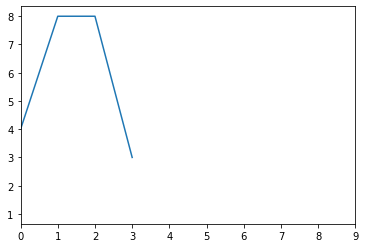

In [0]:
# írassuk ki az oszlopok minimális, maximális és és átlagos értékét
data = []
for c in df.columns[22:30]: # kihagyjuk a dátum oszlopot, mivel ott nincs értelme az átlagnak
    se = df[c]
    data.append({"column": c, "min": se.min(), "max": se.max(), "mean": se.mean()})
    # (megjegyzés: a pandas a NaN értékeket nem veszi figyelembe a statisztikakészítéskor)
stats = pd.DataFrame(data)
stats

# megjegyzés: a statisztikákat a describe() függvény segítségével is lekérhettük volna
print(df["player1 aces"].describe()) # <= egy oszlop statisztikáit adja vissza (Series-be csomagolva)

df.describe() # <= az összes oszlop statisztikáit visszaadja (DataFrame-be csomagolva)

df["player1 aces"][:10].plot()

In [0]:
player = 'Roger Federer'
df['win'] = df['winner'] == player
df['win'].tail()

1174    False
1175     True
1176     True
1177     True
1178    False
Name: win, dtype: bool

In [0]:
won = 100 * df['win'].mean()
print(f"{player}  {won:.0f}% -ban győzött a mérkőzései során.")

Roger Federer  82% -ban győzött a mérkőzései során.


In [0]:
date = df['start date']
print(date)
print('------------------')
df['dblfaults'] = (df['player1 double faults'] /  df['player1 total points total'])
print(df['dblfaults'].tail())
print('------------------')
print(df['dblfaults'].describe())

0       05.10.1998
1       28.09.1998
2       28.09.1998
3       28.09.1998
4       24.08.1998
           ...    
1174    16.01.2012
1175    02.01.2012
1176    02.01.2012
1177    02.01.2012
1178    02.01.2012
Name: start date, Length: 1179, dtype: object
------------------
1174    0.018116
1175    0.000000
1176    0.000000
1177    0.011561
1178         NaN
Name: dblfaults, dtype: float64
------------------
count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: dblfaults, dtype: float64


In [0]:
## milyen tipusú pályákon volt eredményes
df.groupby('surface')['win'].mean()

surface
Indoor: Carpet    0.736842
Indoor: Clay      0.833333
Indoor: Hard      0.836283
Outdoor: Clay     0.779116
Outdoor: Grass    0.871429
Outdoor: Hard     0.842324
Name: win, dtype: float64

(0, 0.06363636363636364)

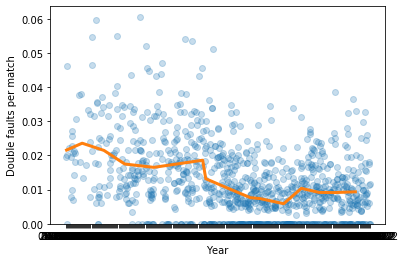

In [0]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

gb = df.groupby('year')


fig, ax = plt.subplots(1, 1)
ax.plot_date(date, df['dblfaults'], alpha=.25, lw=0)
ax.plot_date(gb['start date'].max(), gb['dblfaults'].mean(), '-', lw=3)
ax.set_xlabel('Year')
ax.set_ylabel('Double faults per match')
ax.set_ylim(0)